# Visualization of Concepts in Section 4.7: From Separating Hyperplanes to Duality

This notebook explores key concepts from Section 4.7 of *Introduction to Linear Programming* by Bertsimas and Tsitsiklis.
We will visualize and understand:
- Weierstrass' Theorem
- Separating Hyperplane Theorem
- Farkas' Lemma
- Duality Theorem Revisited

---


## 1. Weierstrass' Theorem

### Mathematical Statement

**Weierstrass' Theorem**: If $S \subset \mathbb{R}^n$ is a closed and bounded set (compact), and $f: S \rightarrow \mathbb{R}$ is a continuous function, then $f$ achieves its maximum and minimum values on $S$. That is, there exist points $x_{min}, x_{max} \in S$ such that:

$$f(x_{min}) \leq f(x) \leq f(x_{max}) \quad \forall x \in S$$

### Significance in Linear Programming

In the context of linear programming:
- The feasible region of a linear program is typically a polyhedron (closed and convex)
- If the feasible region is bounded, Weierstrass' Theorem guarantees that the optimal solution exists
- This is why we often check if a linear program has a bounded feasible region

### Visualization

Below, we visualize a closed and bounded convex set (a circle). Weierstrass' Theorem guarantees that any continuous function will achieve its maximum and minimum within this region. We'll also show a linear objective function and its optimal points.


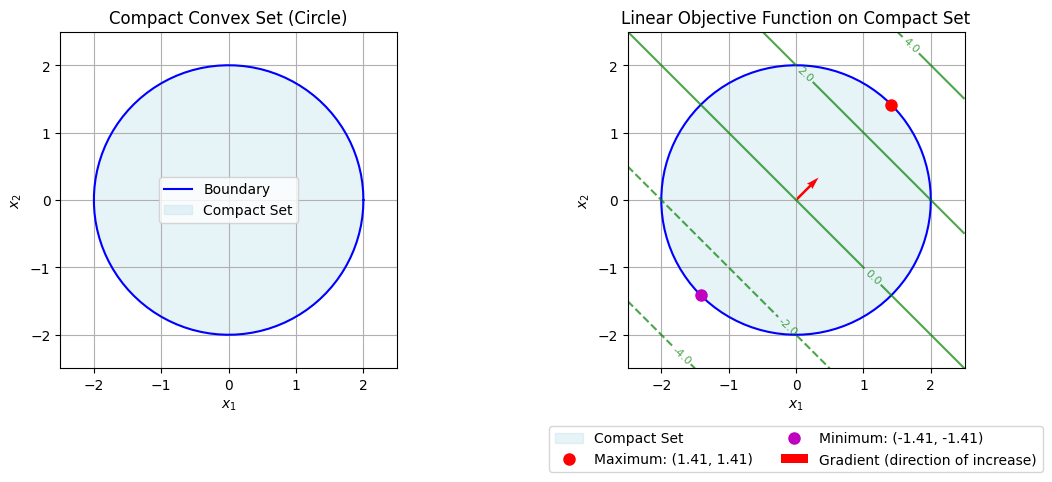

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

# Add the parent directory to the path to import visualization utilities
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.visualization import plot_2d_lp

# Define the closed and bounded convex set (circle in this case)
theta = np.linspace(0, 2*np.pi, 100)
radius = 2
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Basic visualization of the compact set
ax1.plot(x_circle, y_circle, 'b-', label="Boundary")
ax1.fill(x_circle, y_circle, color='lightblue', alpha=0.3, label="Compact Set")
ax1.set_xlim(-2.5, 2.5)
ax1.set_ylim(-2.5, 2.5)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title("Compact Convex Set (Circle)")
ax1.grid(True)
ax1.legend()
ax1.set_aspect('equal')

# Second subplot: Visualization with a linear objective function
# Define a linear objective function c₁x₁ + c₂x₂
c1, c2 = 1, 1  # Coefficients of the objective function
c_norm = np.sqrt(c1**2 + c2**2)

# Calculate the optimal point (maximum of the objective function)
# For a circle and linear objective, the maximum is at the boundary in the direction of the gradient
x_max = radius * c1 / c_norm
y_max = radius * c2 / c_norm

# Calculate the minimum point (opposite direction)
x_min = -x_max
y_min = -y_max

# Plot the compact set
ax2.plot(x_circle, y_circle, 'b-')
ax2.fill(x_circle, y_circle, color='lightblue', alpha=0.3, label="Compact Set")

# Plot the objective function contours
x_grid = np.linspace(-2.5, 2.5, 100)
y_grid = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = c1*X + c2*Y  # Linear objective function
contour = ax2.contour(X, Y, Z, 5, colors='green', alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8, fmt='%.1f')

# Plot the optimal points
ax2.plot(x_max, y_max, 'ro', markersize=8, label=f'Maximum: ({x_max:.2f}, {y_max:.2f})')
ax2.plot(x_min, y_min, 'mo', markersize=8, label=f'Minimum: ({x_min:.2f}, {y_min:.2f})')

# Plot the gradient vector (direction of increase)
ax2.quiver(0, 0, c1, c2, angles='xy', scale_units='xy', scale=3, color='red', 
          label='Gradient (direction of increase)')

ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(-2.5, 2.5)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title("Linear Objective Function on Compact Set")
ax2.grid(True)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

# Additional example using the plot_2d_lp function

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\g'
/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/3104039970.py:3: SyntaxWarning: invalid escape sequence '\l'
  {'coeffs': (1, 0), 'rhs': 2, 'type': '<=', 'label': '$x_1 \leq 2$', 'color': 'blue'},
/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/3104039970.py:4: SyntaxWarning: invalid escape sequence '\g'
  {'coeffs': (-1, 0), 'rhs': -(-2), 'type': '<=', 'label': '$x_1 \geq -2$', 'color': 'green'},
/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/3104039970.py:5: SyntaxWarning: invalid escape sequence '\l'
  {'coeffs': (0, 1), 'rhs': 2, 'type': 

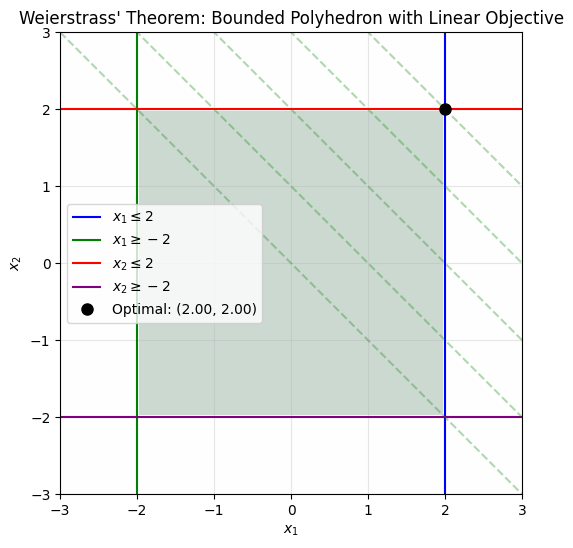

In [2]:
# Create a bounded polyhedron (square) with constraints
constraints = [
    {'coeffs': (1, 0), 'rhs': 2, 'type': '<=', 'label': '$x_1 \leq 2$', 'color': 'blue'},
    {'coeffs': (-1, 0), 'rhs': -(-2), 'type': '<=', 'label': '$x_1 \geq -2$', 'color': 'green'},
    {'coeffs': (0, 1), 'rhs': 2, 'type': '<=', 'label': '$x_2 \leq 2$', 'color': 'red'},
    {'coeffs': (0, -1), 'rhs': -(-2), 'type': '<=', 'label': '$x_2 \geq -2$', 'color': 'purple'}
]

# Define an objective function
objective = {
    'coeffs': (1, 1),  # Maximize x₁ + x₂
    'sense': 'max',
    'contour_values': [0, 1, 2, 3, 4]
}

# The optimal point for this objective is (2, 2)
optimal_point = (2, 2)

# Plot the LP
fig, ax = plot_2d_lp(
    constraints=constraints,
    objective=objective,
    optimal_point=optimal_point,
    x_range=(-3, 3),
    y_range=(-3, 3),
    title="Weierstrass' Theorem: Bounded Polyhedron with Linear Objective",
    show_feasible_region=True,
    show_obj_contours=True,
    figsize=(8, 6)
)

plt.show()


## 2. Separating Hyperplane Theorem

### Mathematical Statement

**Separating Hyperplane Theorem**: Let $A$ and $B$ be two disjoint nonempty convex sets in $\mathbb{R}^n$. Then there exists a nonzero vector $p \in \mathbb{R}^n$ and a scalar $q \in \mathbb{R}$ such that:

$$p^T x \leq q \quad \forall x \in A$$
$$p^T x \geq q \quad \forall x \in B$$

The hyperplane $\{x \in \mathbb{R}^n : p^T x = q\}$ is called a separating hyperplane.

### Geometric Interpretation

- The vector $p$ is normal to the separating hyperplane
- The scalar $q$ determines the position of the hyperplane
- The hyperplane divides the space into two half-spaces, with $A$ in one half-space and $B$ in the other

### Significance in Linear Programming

The Separating Hyperplane Theorem is fundamental to duality theory:
- It provides the mathematical foundation for the existence of dual variables
- It establishes the relationship between primal and dual feasibility
- It helps prove the strong duality theorem

### Visualization

Below, we visualize the Separating Hyperplane Theorem with different examples of disjoint convex sets.


/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/4225694132.py:89: RuntimeWarning: divide by zero encountered in scalar divide
  slope = -normal[0] / normal[1]  # Slope of the line


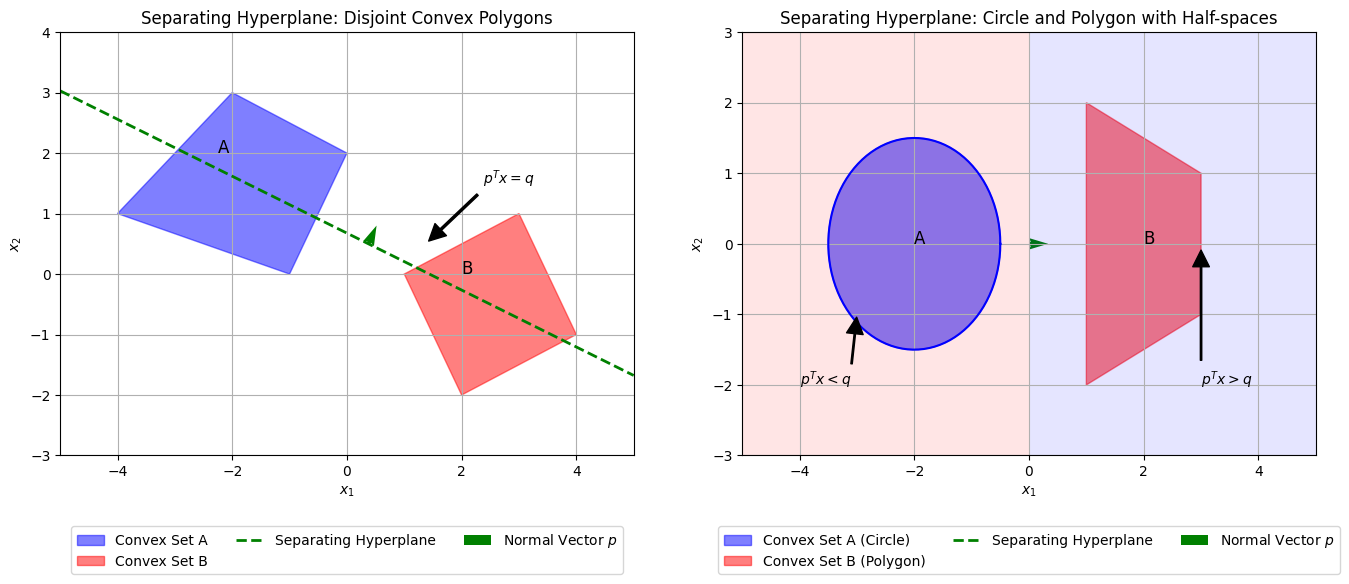

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Example 1: Two disjoint convex polygons
# Define the vertices of two convex polygons
poly1_vertices = np.array([[-4, 1], [-2, 3], [0, 2], [-1, 0]])
poly2_vertices = np.array([[1, 0], [3, 1], [4, -1], [2, -2]])

# Create polygon patches
poly1 = Polygon(poly1_vertices, closed=True, alpha=0.5, color='blue', label='Convex Set A')
poly2 = Polygon(poly2_vertices, closed=True, alpha=0.5, color='red', label='Convex Set B')

# Add polygons to the first subplot
ax1.add_patch(poly1)
ax1.add_patch(poly2)

# Calculate the normal vector to the separating hyperplane
# For simplicity, we'll use a vector perpendicular to the line connecting the centroids
centroid1 = np.mean(poly1_vertices, axis=0)
centroid2 = np.mean(poly2_vertices, axis=0)
direction = centroid2 - centroid1
normal = np.array([-direction[1], direction[0]])  # Perpendicular vector
normal = normal / np.linalg.norm(normal)  # Normalize

# Find a point on the separating line (midpoint between centroids)
midpoint = (centroid1 + centroid2) / 2

# Plot the separating hyperplane
x_vals = np.linspace(-5, 5, 100)
y_vals = midpoint[1] + (x_vals - midpoint[0]) * (-normal[0] / normal[1])
ax1.plot(x_vals, y_vals, '--', color='green', linewidth=2, label='Separating Hyperplane')

# Plot the normal vector
ax1.quiver(midpoint[0], midpoint[1], normal[0], normal[1], 
          angles='xy', scale_units='xy', scale=3, color='green',
          width=0.008, label='Normal Vector $p$')

# Add labels and annotations
ax1.text(centroid1[0]-0.5, centroid1[1]+0.5, 'A', fontsize=12)
ax1.text(centroid2[0]-0.5, centroid2[1]+0.5, 'B', fontsize=12)
ax1.annotate('$p^T x = q$', xy=(midpoint[0]+1, midpoint[1]), 
            xytext=(midpoint[0]+2, midpoint[1]+1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# Set limits and labels
ax1.set_xlim(-5, 5)
ax1.set_ylim(-3, 4)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('Separating Hyperplane: Disjoint Convex Polygons')
ax1.grid(True)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Example 2: Two disjoint convex sets (a circle and a polygon)
# Define a circle
theta = np.linspace(0, 2*np.pi, 100)
radius = 1.5
circle_x = -2 + radius * np.cos(theta)
circle_y = 0 + radius * np.sin(theta)

# Define a polygon
poly_vertices = np.array([[1, 2], [3, 1], [3, -1], [1, -2]])

# Plot the circle
ax2.plot(circle_x, circle_y, 'b-')
ax2.fill(circle_x, circle_y, color='blue', alpha=0.5, label='Convex Set A (Circle)')

# Plot the polygon
poly = Polygon(poly_vertices, closed=True, alpha=0.5, color='red', label='Convex Set B (Polygon)')
ax2.add_patch(poly)

# Calculate centroids
circle_centroid = np.array([-2, 0])
poly_centroid = np.mean(poly_vertices, axis=0)

# Calculate the normal vector to the separating hyperplane
direction = poly_centroid - circle_centroid
normal = direction / np.linalg.norm(direction)  # Normalize

# Find a point on the separating line
midpoint = (circle_centroid + poly_centroid) / 2

# Plot the separating hyperplane
# The hyperplane is perpendicular to the normal vector and passes through the midpoint
slope = -normal[0] / normal[1]  # Slope of the line
x_vals = np.linspace(-5, 5, 100)
y_vals = midpoint[1] + (x_vals - midpoint[0]) * slope
ax2.plot(x_vals, y_vals, '--', color='green', linewidth=2, label='Separating Hyperplane')

# Plot the normal vector
ax2.quiver(midpoint[0], midpoint[1], normal[0], normal[1], 
          angles='xy', scale_units='xy', scale=3, color='green',
          width=0.008, label='Normal Vector $p$')

# Add half-space shading
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-3, 3, 100))
z = normal[0]*(xx - midpoint[0]) + normal[1]*(yy - midpoint[1])
ax2.contourf(xx, yy, z, levels=[0, 10], alpha=0.1, colors=['blue'])
ax2.contourf(xx, yy, z, levels=[-10, 0], alpha=0.1, colors=['red'])

# Add labels and annotations
ax2.text(circle_centroid[0], circle_centroid[1], 'A', fontsize=12)
ax2.text(poly_centroid[0], poly_centroid[1], 'B', fontsize=12)
ax2.annotate('$p^T x < q$', xy=(-3, -1), xytext=(-4, -2),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))
ax2.annotate('$p^T x > q$', xy=(3, 0), xytext=(3, -2),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))

# Set limits and labels
ax2.set_xlim(-5, 5)
ax2.set_ylim(-3, 3)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Separating Hyperplane: Circle and Polygon with Half-spaces')
ax2.grid(True)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show()

# Example 3: Strictly Separating Hyperplane

/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/3384088976.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  y_vals = midpoint[1] + (x_vals - midpoint[0]) * (-normal[0] / normal[1])
/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/3384088976.py:50: RuntimeWarning: divide by zero encountered in scalar divide
  y_vals_strict = strict_midpoint[1] + (x_vals_strict - strict_midpoint[0]) * (-normal[0] / normal[1])


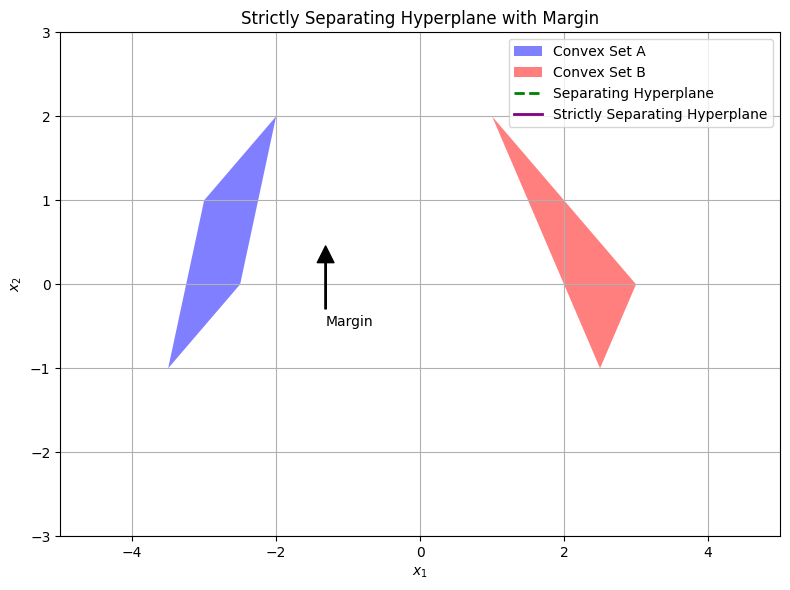

In [4]:
# Create a figure
plt.figure(figsize=(8, 6))

# Define two disjoint convex sets
# Set A: Points
A_x = np.array([-3, -2, -2.5, -3.5])
A_y = np.array([1, 2, 0, -1])

# Set B: Points
B_x = np.array([1, 2, 3, 2.5])
B_y = np.array([2, 1, 0, -1])

# Create convex hulls
from scipy.spatial import ConvexHull

A_points = np.column_stack((A_x, A_y))
B_points = np.column_stack((B_x, B_y))

A_hull = ConvexHull(A_points)
B_hull = ConvexHull(B_points)

# Plot the convex hulls
plt.fill(A_points[A_hull.vertices, 0], A_points[A_hull.vertices, 1], 
         'blue', alpha=0.5, label='Convex Set A')
plt.fill(B_points[B_hull.vertices, 0], B_points[B_hull.vertices, 1], 
         'red', alpha=0.5, label='Convex Set B')

# Calculate centroids
A_centroid = np.mean(A_points, axis=0)
B_centroid = np.mean(B_points, axis=0)

# Calculate the normal vector to the separating hyperplane
direction = B_centroid - A_centroid
normal = direction / np.linalg.norm(direction)  # Normalize

# Find a point on the separating line
midpoint = (A_centroid + B_centroid) / 2

# Plot the separating hyperplane
x_vals = np.linspace(-5, 5, 100)
y_vals = midpoint[1] + (x_vals - midpoint[0]) * (-normal[0] / normal[1])
plt.plot(x_vals, y_vals, '--', color='green', linewidth=2, label='Separating Hyperplane')

# Plot a strictly separating hyperplane (with margin)
# Move the hyperplane slightly towards set A
margin = 0.5
strict_midpoint = midpoint - margin * normal

x_vals_strict = np.linspace(-5, 5, 100)
y_vals_strict = strict_midpoint[1] + (x_vals_strict - strict_midpoint[0]) * (-normal[0] / normal[1])
plt.plot(x_vals_strict, y_vals_strict, '-', color='purple', linewidth=2, 
         label='Strictly Separating Hyperplane')

# Add annotations
plt.annotate('Margin', xy=(midpoint[0]-1, midpoint[1]), 
            xytext=(midpoint[0]-1, midpoint[1]-1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))

# Set limits and labels
plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Strictly Separating Hyperplane with Margin')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 3. Farkas' Lemma

### Mathematical Statement

**Farkas' Lemma**: Let $A \in \mathbb{R}^{m \times n}$ and $b \in \mathbb{R}^m$. Then exactly one of the following two systems has a solution:

**System 1**: $Ax = b, x \geq 0$ (Primal system)

**System 2**: $A^T y \leq 0, b^T y > 0$ (Alternative system)

In other words, either:
1. There exists $x \in \mathbb{R}^n$ such that $Ax = b$ and $x \geq 0$, or
2. There exists $y \in \mathbb{R}^m$ such that $A^T y \leq 0$ and $b^T y > 0$.

But never both.

### Geometric Interpretation

Farkas' Lemma can be interpreted geometrically:
- The columns of $A$ are vectors $a_1, a_2, \ldots, a_n \in \mathbb{R}^m$
- System 1 asks: Can $b$ be expressed as a nonnegative linear combination of the columns of $A$?
- System 2 provides a certificate of infeasibility: If there exists a hyperplane that separates $b$ from the cone generated by the columns of $A$, then System 1 is infeasible

### Significance in Linear Programming

Farkas' Lemma is fundamental to linear programming theory:
- It provides the theoretical foundation for duality theory
- It gives a certificate of infeasibility for linear programs
- It is used to prove the strong duality theorem
- It connects to the concept of separating hyperplanes

### Visualization

Below, we visualize Farkas' Lemma with different examples.


<>:117: SyntaxWarning: invalid escape sequence '\l'
<>:119: SyntaxWarning: invalid escape sequence '\l'
<>:117: SyntaxWarning: invalid escape sequence '\l'
<>:119: SyntaxWarning: invalid escape sequence '\l'
/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/1106833469.py:117: SyntaxWarning: invalid escape sequence '\l'
  ax2.annotate('$y^T a_1 \leq 0$', xy=(a1[0], a1[1]), xytext=(a1[0]-1, a1[1]+1),
/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/1106833469.py:119: SyntaxWarning: invalid escape sequence '\l'
  ax2.annotate('$y^T a_2 \leq 0$', xy=(a2[0], a2[1]), xytext=(a2[0]+1, a2[1]+1),


y^T*a1 = 1
y^T*a2 = -1
y^T*b = 3


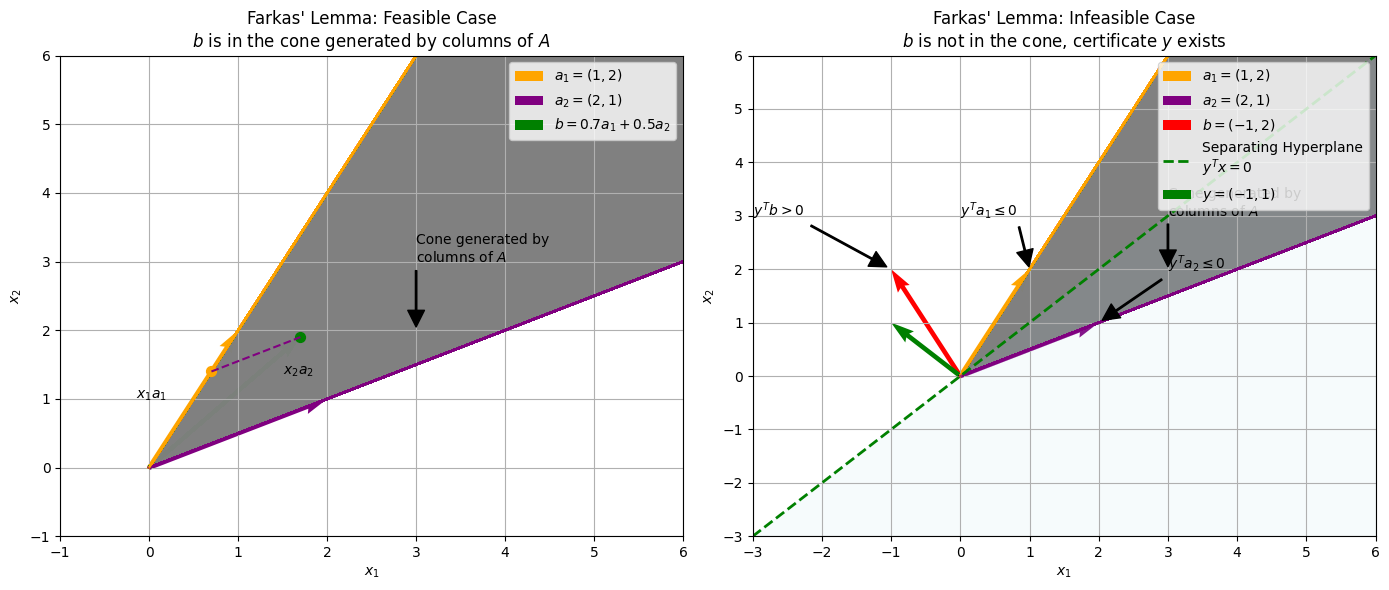

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Example 1: Feasible case - b is in the cone generated by columns of A
# Define two vectors a1 and a2 (columns of A)
a1 = np.array([1, 2])
a2 = np.array([2, 1])

# Define b as a nonnegative combination of a1 and a2
x1, x2 = 0.7, 0.5  # Nonnegative coefficients
b = x1 * a1 + x2 * a2

# Plot the vectors
ax1.quiver(0, 0, a1[0], a1[1], angles='xy', scale_units='xy', scale=1, color='orange', 
          label='$a_1 = (1,2)$')
ax1.quiver(0, 0, a2[0], a2[1], angles='xy', scale_units='xy', scale=1, color='purple', 
          label='$a_2 = (2,1)$')
ax1.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='green', 
          label='$b = {}a_1 + {}a_2$'.format(x1, x2))

# Shade the cone generated by a1 and a2
t = np.linspace(0, 1, 100)
for i in range(len(t)):
    # Draw rays from origin in all directions within the cone
    ax1.plot([0, 5*a1[0]], [0, 5*a1[1]], 'orange', alpha=0.1)
    ax1.plot([0, 5*a2[0]], [0, 5*a2[1]], 'purple', alpha=0.1)
    # Draw the boundary of the cone
    ax1.plot([0, 5*a1[0]], [0, 5*a1[1]], 'orange', alpha=0.5)
    ax1.plot([0, 5*a2[0]], [0, 5*a2[1]], 'purple', alpha=0.5)
    # Shade the cone
    cone_boundary = np.array([[0, 0], [5*a1[0], 5*a1[1]], [5*(a1[0]+a2[0]), 5*(a1[1]+a2[1])], [5*a2[0], 5*a2[1]]])
    cone = Polygon(cone_boundary, closed=True, alpha=0.2, color='gray')
    ax1.add_patch(cone)

# Show the nonnegative combination
ax1.plot([0, x1*a1[0]], [0, x1*a1[1]], 'orange', linestyle='--')
ax1.plot([x1*a1[0], x1*a1[0] + x2*a2[0]], [x1*a1[1], x1*a1[1] + x2*a2[1]], 'purple', linestyle='--')
ax1.scatter(x1*a1[0], x1*a1[1], color='orange', s=50)
ax1.scatter(b[0], b[1], color='green', s=50)

# Add annotations
ax1.annotate('$x_1 a_1$', xy=(x1*a1[0]/2, x1*a1[1]/2), xytext=(x1*a1[0]/2-0.5, x1*a1[1]/2+0.3))
ax1.annotate('$x_2 a_2$', xy=(x1*a1[0] + x2*a2[0]/2, x1*a1[1] + x2*a2[1]/2), 
            xytext=(x1*a1[0] + x2*a2[0]/2+0.3, x1*a1[1] + x2*a2[1]/2-0.3))
ax1.annotate('Cone generated by\ncolumns of $A$', xy=(3, 2), xytext=(3, 3),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))

# Set limits and labels
ax1.set_xlim(-1, 6)
ax1.set_ylim(-1, 6)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title("Farkas' Lemma: Feasible Case\n$b$ is in the cone generated by columns of $A$")
ax1.grid(True)
ax1.legend(loc='upper right')

# Example 2: Infeasible case - b is not in the cone generated by columns of A
# Define two vectors a1 and a2 (columns of A)
a1 = np.array([1, 2])
a2 = np.array([2, 1])

# Define b that is not in the cone generated by a1 and a2
b_infeasible = np.array([-1, 2])

# Plot the vectors
ax2.quiver(0, 0, a1[0], a1[1], angles='xy', scale_units='xy', scale=1, color='orange', 
          label='$a_1 = (1,2)$')
ax2.quiver(0, 0, a2[0], a2[1], angles='xy', scale_units='xy', scale=1, color='purple', 
          label='$a_2 = (2,1)$')
ax2.quiver(0, 0, b_infeasible[0], b_infeasible[1], angles='xy', scale_units='xy', scale=1, color='red', 
          label='$b = (-1,2)$')

# Shade the cone generated by a1 and a2
t = np.linspace(0, 1, 100)
for i in range(len(t)):
    # Draw rays from origin in all directions within the cone
    ax2.plot([0, 5*a1[0]], [0, 5*a1[1]], 'orange', alpha=0.1)
    ax2.plot([0, 5*a2[0]], [0, 5*a2[1]], 'purple', alpha=0.1)
    # Draw the boundary of the cone
    ax2.plot([0, 5*a1[0]], [0, 5*a1[1]], 'orange', alpha=0.5)
    ax2.plot([0, 5*a2[0]], [0, 5*a2[1]], 'purple', alpha=0.5)
    # Shade the cone
    cone_boundary = np.array([[0, 0], [5*a1[0], 5*a1[1]], [5*(a1[0]+a2[0]), 5*(a1[1]+a2[1])], [5*a2[0], 5*a2[1]]])
    cone = Polygon(cone_boundary, closed=True, alpha=0.2, color='gray')
    ax2.add_patch(cone)

# Find a separating hyperplane (certificate of infeasibility)
# We need y such that y^T*a1 <= 0, y^T*a2 <= 0, and y^T*b > 0
# For this example, y = [-1, 1] works
y = np.array([-1, 1])

# Verify the certificate
print(f"y^T*a1 = {np.dot(y, a1)}")
print(f"y^T*a2 = {np.dot(y, a2)}")
print(f"y^T*b = {np.dot(y, b_infeasible)}")

# Plot the separating hyperplane
# The hyperplane is defined by y^T*x = 0
x_vals = np.linspace(-3, 6, 100)
y_vals = (y[0] * x_vals) / (-y[1])  # y^T*x = 0 => y[0]*x + y[1]*y = 0 => y = -y[0]*x/y[1]
ax2.plot(x_vals, y_vals, '--', color='green', linewidth=2, label='Separating Hyperplane\n$y^T x = 0$')

# Plot the normal vector to the hyperplane
ax2.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, color='green', 
          label='$y = (-1,1)$')

# Shade the half-space y^T*x <= 0
xx, yy = np.meshgrid(np.linspace(-3, 6, 100), np.linspace(-3, 6, 100))
z = y[0]*xx + y[1]*yy
ax2.contourf(xx, yy, z, levels=[-10, 0], alpha=0.1, colors=['lightblue'])

# Add annotations
ax2.annotate('$y^T a_1 \leq 0$', xy=(a1[0], a1[1]), xytext=(a1[0]-1, a1[1]+1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))
ax2.annotate('$y^T a_2 \leq 0$', xy=(a2[0], a2[1]), xytext=(a2[0]+1, a2[1]+1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))
ax2.annotate('$y^T b > 0$', xy=(b_infeasible[0], b_infeasible[1]), xytext=(b_infeasible[0]-2, b_infeasible[1]+1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))
ax2.annotate('Cone generated by\ncolumns of $A$', xy=(3, 2), xytext=(3, 3),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))

# Set limits and labels
ax2.set_xlim(-3, 6)
ax2.set_ylim(-3, 6)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title("Farkas' Lemma: Infeasible Case\n$b$ is not in the cone, certificate $y$ exists")
ax2.grid(True)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Example 3: Linear Programming Interpretation

<>:27: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:58: SyntaxWarning: invalid escape sequence '\g'
<>:27: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:58: SyntaxWarning: invalid escape sequence '\g'
/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/2520134270.py:27: SyntaxWarning: invalid escape sequence '\g'
  plt.axvline(x=0, color='g', linestyle='-', label='$x \geq 0$')
/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/2520134270.py:28: SyntaxWarning: invalid escape sequence '\g'
  plt.axhline(y=0, color='purple', linestyle='-', label='$y \geq 0$')
/var/folders/40/n3tpby6j5bb34_vjdntsyzg40000gn/T/ipykernel_11510/2520134270.py:58: SyntaxWarning: invalid escape sequence '\g'
  plt.title("Farkas' Lemma: Linear Programming Interpretation\nFeasible System: $Ax = b, x \geq 0$")


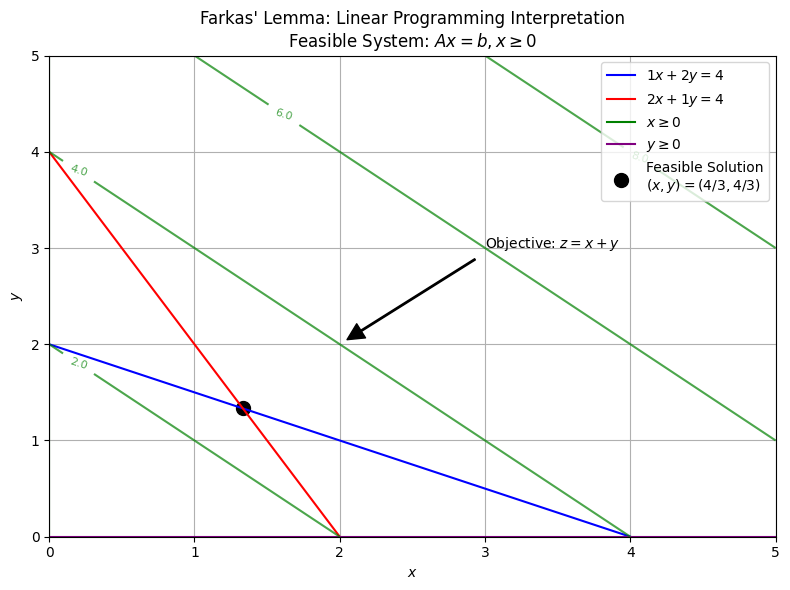

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Create a figure
plt.figure(figsize=(8, 6))

# Define a simple LP: min c^T x subject to Ax = b, x >= 0
# A = [1 2; 2 1], b = [4; 4], c = [1; 1]
A = np.array([[1, 2], [2, 1]])
b = np.array([4, 4])
c = np.array([1, 1])

# Plot the feasible region
# The constraints are:
# 1x + 2y = 4
# 2x + 1y = 4
# x, y >= 0

# Plot the constraints
x = np.linspace(0, 5, 100)
y1 = (4 - 1*x) / 2  # From 1x + 2y = 4
y2 = (4 - 2*x) / 1  # From 2x + 1y = 4

plt.plot(x, y1, 'b-', label='$1x + 2y = 4$')
plt.plot(x, y2, 'r-', label='$2x + 1y = 4$')
plt.axvline(x=0, color='g', linestyle='-', label='$x \geq 0$')
plt.axhline(y=0, color='purple', linestyle='-', label='$y \geq 0$')

# Find the intersection point (the unique feasible solution)
# Solving the system:
# 1x + 2y = 4
# 2x + 1y = 4
# We get x = 4/3, y = 4/3
x_sol = 4/3
y_sol = 4/3

# Plot the feasible point
plt.scatter(x_sol, y_sol, color='black', s=100, label='Feasible Solution\n$(x,y) = (4/3, 4/3)$')

# Plot the objective function contours
x_grid = np.linspace(0, 5, 100)
y_grid = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = c[0]*X + c[1]*Y  # Objective function z = x + y
contour = plt.contour(X, Y, Z, 5, colors='green', alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8, fmt='%.1f')

# Add annotations
plt.annotate('Objective: $z = x + y$', xy=(2, 2), xytext=(3, 3),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))

# Set limits and labels
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Farkas' Lemma: Linear Programming Interpretation\nFeasible System: $Ax = b, x \geq 0$")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## 4. Duality Theorem Revisited

### Mathematical Statement

**Strong Duality Theorem**: If the primal problem has an optimal solution $x^*$, then the dual problem also has an optimal solution $y^*$, and the optimal objective values are equal:

$$c^T x^* = b^T y^*$$

For standard form linear programs:

**Primal Problem**:
$$\min c^T x$$
$$\text{subject to } Ax = b$$
$$x \geq 0$$

**Dual Problem**:
$$\max b^T y$$
$$\text{subject to } A^T y \leq c$$

### Complementary Slackness

If $x^*$ and $y^*$ are optimal solutions to the primal and dual problems, respectively, then:

$$x_j^* (c_j - a_j^T y^*) = 0 \quad \forall j$$

This means:
- If a primal variable $x_j^* > 0$, then the corresponding dual constraint must be tight: $a_j^T y^* = c_j$
- If a dual constraint is not tight ($a_j^T y^* < c_j$), then the corresponding primal variable must be zero: $x_j^* = 0$

### Geometric Interpretation

The duality theorem can be interpreted geometrically:
- The optimal objective value occurs at the point where the objective function is tangent to the feasible region
- The dual variables represent the rate of change of the optimal objective value with respect to changes in the constraints
- The optimal hyperplane separates the primal and dual feasible regions

### Visualization

Below, we visualize the duality theorem with different examples.


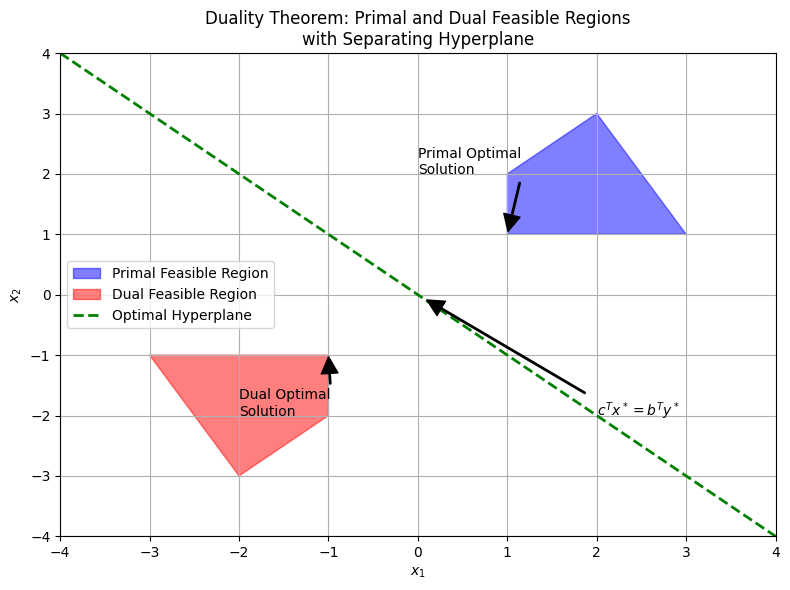

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Example 1: Primal and Dual Feasible Regions with Separating Hyperplane
# Create a figure
plt.figure(figsize=(8, 6))

# Define the primal feasible region (a polyhedron)
primal_vertices = np.array([[1, 1], [3, 1], [2, 3], [1, 2]])
primal_poly = Polygon(primal_vertices, closed=True, alpha=0.5, color='blue', label='Primal Feasible Region')

# Define the dual feasible region (another polyhedron)
dual_vertices = np.array([[-1, -1], [-3, -1], [-2, -3], [-1, -2]])
dual_poly = Polygon(dual_vertices, closed=True, alpha=0.5, color='red', label='Dual Feasible Region')

# Add polygons to the plot
plt.gca().add_patch(primal_poly)
plt.gca().add_patch(dual_poly)

# Define the separating hyperplane (optimal hyperplane)
x_vals = np.linspace(-4, 4, 100)
y_vals = -x_vals  # Hyperplane equation: x + y = 0
plt.plot(x_vals, y_vals, '--', color='green', linewidth=2, label='Optimal Hyperplane')

# Add annotations
plt.annotate('Primal Optimal\nSolution', xy=(1, 1), xytext=(0, 2),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))
plt.annotate('Dual Optimal\nSolution', xy=(-1, -1), xytext=(-2, -2),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))
plt.annotate('$c^T x^* = b^T y^*$', xy=(0, 0), xytext=(2, -2),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))

# Set limits and labels
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Duality Theorem: Primal and Dual Feasible Regions\nwith Separating Hyperplane')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Example 2: Complementary Slackness Visualization

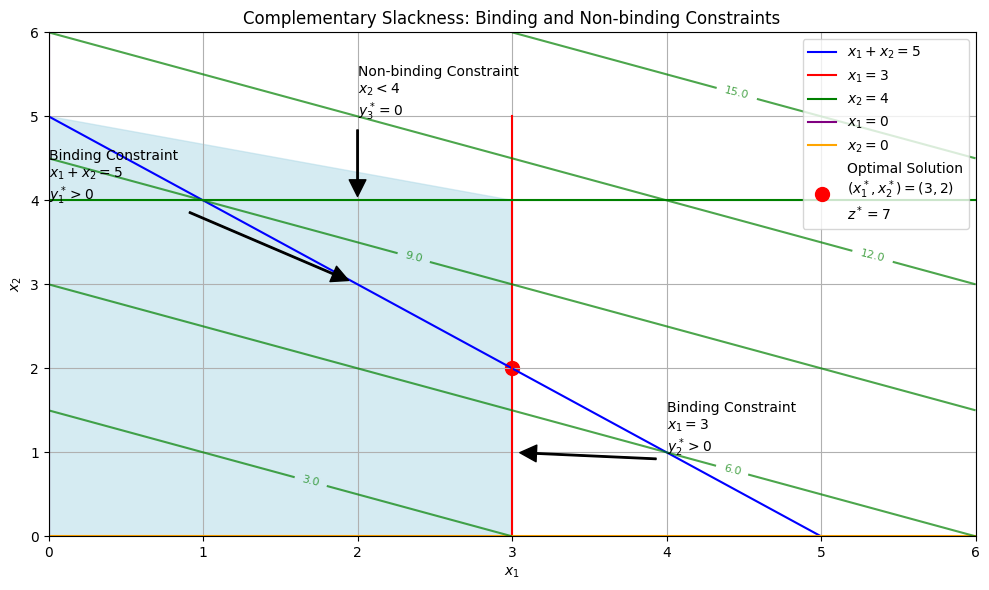

In [8]:
# Create a figure
plt.figure(figsize=(10, 6))

# Define a simple LP: min c^T x subject to Ax <= b, x >= 0
# min x1 + 2x2
# s.t. x1 + x2 <= 5
#      x1 <= 3
#      x2 <= 4
#      x1, x2 >= 0

# Plot the constraints
x1 = np.linspace(0, 6, 100)
x2_1 = 5 - x1  # From x1 + x2 <= 5
x2_2 = np.ones_like(x1) * 4  # From x2 <= 4
x1_1 = np.ones_like(x1) * 3  # From x1 <= 3

plt.plot(x1, x2_1, 'b-', label='$x_1 + x_2 = 5$')
plt.plot(x1_1, np.linspace(0, 5, 100), 'r-', label='$x_1 = 3$')
plt.plot(np.linspace(0, 6, 100), x2_2, 'g-', label='$x_2 = 4$')
plt.axvline(x=0, color='purple', linestyle='-', label='$x_1 = 0$')
plt.axhline(y=0, color='orange', linestyle='-', label='$x_2 = 0$')

# Shade the feasible region
feasible_x1 = np.array([0, 3, 3, 0])
feasible_x2 = np.array([0, 0, 4, 5])
plt.fill(feasible_x1, feasible_x2, color='lightblue', alpha=0.5)

# Plot the objective function contours
x1_grid = np.linspace(0, 6, 100)
x2_grid = np.linspace(0, 6, 100)
X1, X2 = np.meshgrid(x1_grid, x2_grid)
Z = 1*X1 + 2*X2  # Objective function z = x1 + 2x2
contour = plt.contour(X1, X2, Z, 5, colors='green', alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8, fmt='%.1f')

# Find the optimal solution
# The optimal solution is at the intersection of x1 + x2 = 5 and x1 = 3
x1_opt = 3
x2_opt = 2
z_opt = 1*x1_opt + 2*x2_opt

# Plot the optimal solution
plt.scatter(x1_opt, x2_opt, color='red', s=100, label=f'Optimal Solution\n$(x_1^*, x_2^*) = ({x1_opt}, {x2_opt})$\n$z^* = {z_opt}$')

# Identify the binding constraints at the optimal solution
# Binding constraints: x1 = 3, x1 + x2 = 5
# Non-binding constraints: x2 = 4, x1 = 0, x2 = 0

# Dual variables (shadow prices)
# y1 = 1 (for x1 + x2 <= 5)
# y2 = 1 (for x1 <= 3)
# y3 = 0 (for x2 <= 4)

# Add annotations for complementary slackness
plt.annotate('Binding Constraint\n$x_1 = 3$\n$y_2^* > 0$', xy=(3, 1), xytext=(4, 1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))
plt.annotate('Binding Constraint\n$x_1 + x_2 = 5$\n$y_1^* > 0$', xy=(2, 3), xytext=(0, 4),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))
plt.annotate('Non-binding Constraint\n$x_2 < 4$\n$y_3^* = 0$', xy=(2, 4), xytext=(2, 5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))

# Set limits and labels
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Complementary Slackness: Binding and Non-binding Constraints')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Example 3: Economic Interpretation of Duality

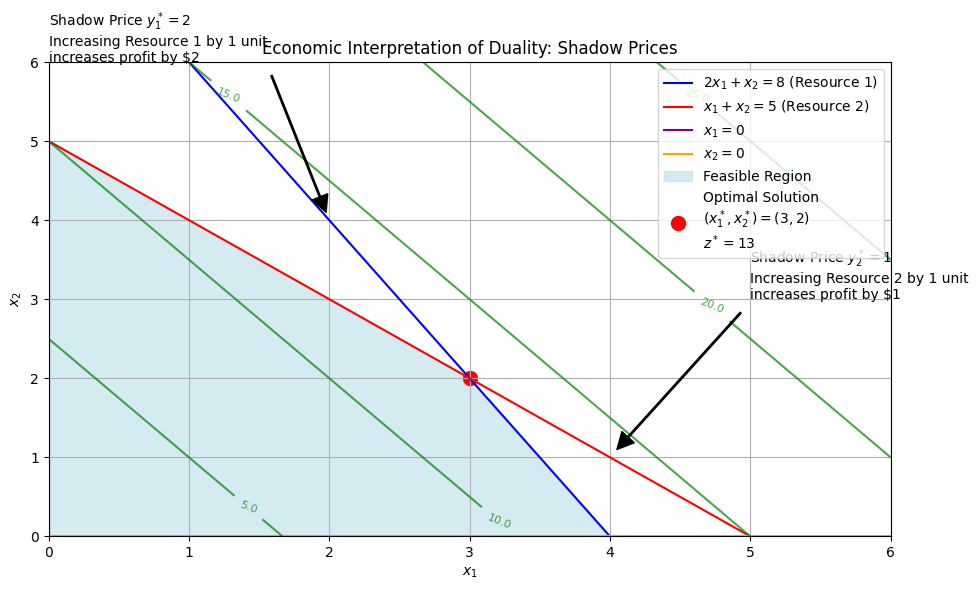

In [9]:
# Create a figure
plt.figure(figsize=(10, 6))

# Define a resource allocation problem
# max 3x1 + 2x2 (profit)
# s.t. 2x1 + x2 <= 8 (resource 1)
#      x1 + x2 <= 5 (resource 2)
#      x1, x2 >= 0

# Plot the constraints
x1 = np.linspace(0, 6, 100)
x2_1 = 8 - 2*x1  # From 2x1 + x2 <= 8
x2_2 = 5 - x1    # From x1 + x2 <= 5

plt.plot(x1, x2_1, 'b-', label='$2x_1 + x_2 = 8$ (Resource 1)')
plt.plot(x1, x2_2, 'r-', label='$x_1 + x_2 = 5$ (Resource 2)')
plt.axvline(x=0, color='purple', linestyle='-', label='$x_1 = 0$')
plt.axhline(y=0, color='orange', linestyle='-', label='$x_2 = 0$')

# Find the vertices of the feasible region
vertices_x = [0, 0, 3, 4]
vertices_y = [0, 5, 2, 0]

# Shade the feasible region
plt.fill(vertices_x, vertices_y, color='lightblue', alpha=0.5, label='Feasible Region')

# Plot the objective function contours
x1_grid = np.linspace(0, 6, 100)
x2_grid = np.linspace(0, 6, 100)
X1, X2 = np.meshgrid(x1_grid, x2_grid)
Z = 3*X1 + 2*X2  # Objective function z = 3x1 + 2x2
contour = plt.contour(X1, X2, Z, 5, colors='green', alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8, fmt='%.1f')

# Find the optimal solution
# The optimal solution is at the intersection of 2x1 + x2 = 8 and x1 + x2 = 5
# Solving:
# 2x1 + x2 = 8
# x1 + x2 = 5
# => x1 = 3, x2 = 2
x1_opt = 3
x2_opt = 2
z_opt = 3*x1_opt + 2*x2_opt

# Plot the optimal solution
plt.scatter(x1_opt, x2_opt, color='red', s=100, label=f'Optimal Solution\n$(x_1^*, x_2^*) = ({x1_opt}, {x2_opt})$\n$z^* = {z_opt}$')

# Dual variables (shadow prices)
# y1 = 2 (for resource 1)
# y2 = 1 (for resource 2)

# Add annotations for economic interpretation
plt.annotate('Shadow Price $y_1^* = 2$\nIncreasing Resource 1 by 1 unit\nincreases profit by $2', 
            xy=(2, 4), xytext=(0, 6),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))
plt.annotate('Shadow Price $y_2^* = 1$\nIncreasing Resource 2 by 1 unit\nincreases profit by $1', 
            xy=(4, 1), xytext=(5, 3),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))

# Set limits and labels
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Economic Interpretation of Duality: Shadow Prices')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Summary

In this notebook, we've visualized and explored key concepts from Section 4.7 of *Introduction to Linear Programming* by Bertsimas and Tsitsiklis:

1. **Weierstrass' Theorem**: Guarantees that continuous functions achieve their maximum and minimum on compact sets, ensuring that linear programs with bounded feasible regions have optimal solutions.

2. **Separating Hyperplane Theorem**: Shows that disjoint convex sets can be separated by a hyperplane, providing the geometric foundation for duality theory.

3. **Farkas' Lemma**: Establishes that either a system of linear equations has a nonnegative solution, or there exists a certificate of infeasibility, connecting to the concept of separating hyperplanes.

4. **Duality Theorem**: Relates primal and dual linear programs, showing that they have equal optimal objective values and satisfy complementary slackness conditions.

These concepts form the theoretical foundation of linear programming and provide insights into the geometric and algebraic structure of optimization problems.
